In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [9]:
IMAGE_SIZE = [224, 224]

train_path = 'D:/New folder/training'
valid_path = 'D:/New folder/training'

In [10]:
from tensorflow.keras.applications import ResNet50


resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False



In [11]:
folders = glob('D:/New folder/training/*')

In [12]:
x = Flatten()(resnet.output)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16


prediction = Dense(1, activation='sigmoid')(x)




model = Model(inputs=resnet.input, outputs=prediction)


model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

 conv2_block1_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block1_1_relu[0][0]']    
                                                                                                  
 conv2_block1_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block1_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block1_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block1_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block1_0_conv (Conv2D)   (None, 56, 56, 256)  16640       ['pool1_pool[0][0]']             
                                                                                                  
 conv2_blo

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/New folder/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('D:/New folder/training',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

Found 8845 images belonging to 3 classes.
Found 8845 images belonging to 3 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

Epoch 1/100
277/277 [==============================] - 68s 231ms/step - loss: 0.7337 - accuracy: 0.6467 - val_loss: 0.6501 - val_accuracy: 0.6553
Epoch 2/100
277/277 [==============================] - 64s 230ms/step - loss: 0.6576 - accuracy: 0.6519 - val_loss: 0.7141 - val_accuracy: 0.6656
Epoch 3/100
277/277 [==============================] - 62s 223ms/step - loss: 0.6674 - accuracy: 0.6424 - val_loss: 0.6792 - val_accuracy: 0.6427
Epoch 4/100
277/277 [==============================] - 62s 224ms/step - loss: 0.6785 - accuracy: 0.6323 - val_loss: 0.6835 - val_accuracy: 0.6438
Epoch 5/100
277/277 [==============================] - 62s 225ms/step - loss: 0.6700 - accuracy: 0.6405 - val_loss: 0.7379 - val_accuracy: 0.5472
Epoch 6/100
277/277 [==============================] - 62s 223ms/step - loss: 0.6617 - accuracy: 0.6474 - val_loss: 0.7203 - val_accuracy: 0.6520
Epoch 7/100
277/277 [==============================] - 62s 224ms/step - loss: 0.6920 - accuracy: 0.6250 - val_loss: 0.6797 -

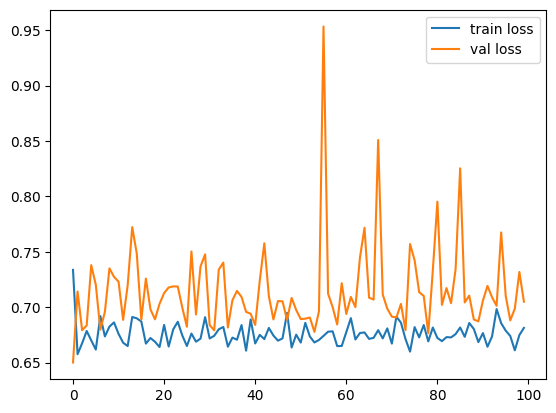

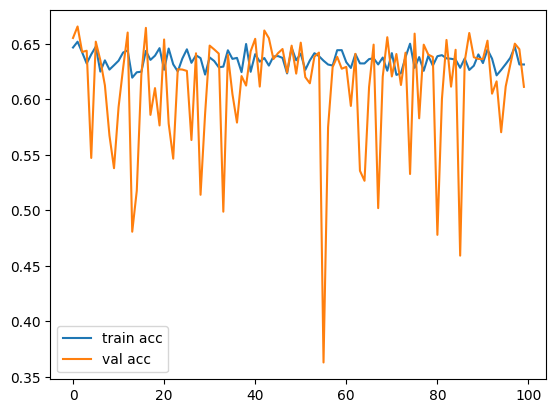

277/277 [==============================] - 16s 56ms/step
Confusion Matrix:
[[   0    0    0]
 [4462    0    0]
 [4383    0    0]]


<Figure size 640x480 with 0 Axes>

In [15]:
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=100,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have test data and ground truth labels
y_true = np.concatenate([test_set[i][1] for i in range(len(test_set))])
y_pred_probs = model.predict(test_set)
y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(np.argmax(y_true, axis=1), y_pred)

print("Confusion Matrix:")
print(cm)
